# Real time Air Quality Index

## Real time National Air Quality Index values from different monitoring stations across India. The pollutants monitored are Sulphur Dioxide (SO2), Nitrogen Dioxide (NO2), Particulate Matter (PM10 and PM2.5) , Carbon Monoxide (CO), Ozone(O3) etc.

In [2]:
df=pd.read_csv('/kaggle/input/real-time-air-quality-index/3b01bcb8-0b14-4abf-b6f2-c1bfd384ba69.csv')

In [4]:
df

country           state           city  \
0      India  Andhra_Pradesh     Vijayawada   
1      India  Andhra_Pradesh     Vijayawada   
2      India  Andhra_Pradesh     Vijayawada   
3      India  Andhra_Pradesh  Visakhapatnam   
4      India  Andhra_Pradesh  Visakhapatnam   
...      ...             ...            ...   
3239   India     West_Bengal        Kolkata   
3240   India     West_Bengal        Kolkata   
3241   India     West_Bengal        Kolkata   
3242   India     West_Bengal        Kolkata   
3243   India     West_Bengal       Siliguri   

                                           station          last_update  \
0            Rajiv Gandhi Park, Vijayawada - APPCB  09-03-2025 05:00:00   
1                  Rajiv Nagar, Vijayawada - APPCB  09-03-2025 05:00:00   
2                  Rajiv Nagar, Vijayawada - APPCB  09-03-2025 05:00:00   
3           GVM Corporation, Visakhapatnam - APPCB  09-03-2025 05:00:00   
4           GVM Corporation, Visakhapatnam - APPCB  09-03-2025 05:00:00   
...                                            ...                  ...   
3239  Rabindra Bharati University, Kolkata - WBPCB  09-03-2025 05:00:00   
3240             Rabindra Sarobar, Kolkata - WBPCB  09-03-2025 05:00:00   
3241                     Victoria, Kolkata - WBPCB  09-03-2025 05:00:00   
3242                     Victoria, Kolkata - WBPCB  09-03-2025 05:00:00   
3243            Ward-32 Bapupara, Siliguri - WBPCB  09-03-2025 05:00:00   

       latitude  longitude pollutant_id  pollutant_min  pollutant_max  \
0     16.509717  80.612222           CO           40.0           46.0   
1     16.554731  80.649110        PM2.5           49.0           61.0   
2     16.554731  80.649110          NO2           14.0           17.0   
3     17.720000  83.300000        PM2.5           32.0           80.0   
4     17.720000  83.300000          NH3            1.0            4.0   
...         ...        ...          ...            ...            ...   
3239  22.627847  88.380669        OZONE           18.0           73.0   
3240  22.511060  88.351420          SO2            4.0           40.0   
3241  22.544808  88.340369         PM10           76.0          137.0   
3242  22.544808  88.340369        OZONE            6.0           69.0   
3243  26.687923  88.415250        OZONE           13.0           17.0   

      pollutant_avg  
0              41.0  
1              54.0  
2              16.0  
3              54.0  
4               2.0  
...             ...  
3239           40.0  
3240           13.0  
3241          108.0  
3242           28.0  
3243           14.0  

[3244 rows x 11 columns]

## Checking for missing values

In [5]:
print(df.isnull().sum())


country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    231
pollutant_max    231
pollutant_avg    231
dtype: int64


## Performaing median imputation

In [9]:
df['pollutant_min'].fillna(df['pollutant_min'].median(), inplace=True)
df['pollutant_max'].fillna(df['pollutant_max'].median(), inplace=True)
df['pollutant_avg'].fillna(df['pollutant_avg'].median(), inplace=True)


<ipython-input-9-33f149895b0c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pollutant_min'].fillna(df['pollutant_min'].median(), inplace=True)
<ipython-input-9-33f149895b0c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [10]:
print(df.isnull().sum())


country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64


## Removing duplicate rows

In [11]:
df = df.drop_duplicates()


# EDA

In [12]:
print(df.describe())


          latitude    longitude  pollutant_min  pollutant_max  pollutant_avg
count  3244.000000  3244.000000    3244.000000    3244.000000    3244.000000
mean     22.280953    78.783293      24.607429      95.750617      50.133631
std       5.530921     4.918145      26.423423      98.337591      49.986074
min       8.514909    70.909168       1.000000       1.000000       1.000000
25%      18.998466    75.565602       6.000000      21.750000      12.000000
50%      23.043070    77.498280      14.000000      68.000000      33.000000
75%      26.803650    80.927299      35.000000     128.000000      74.000000
max      34.066206    94.636574     192.000000     500.000000     320.000000


In [13]:
print("Number of Unique Cities:", df['city'].nunique())
print("Number of Monitoring Stations:", df['station'].nunique())


Number of Unique Cities: 250
Number of Monitoring Stations: 489


In [14]:
print(df['pollutant_id'].value_counts())



pollutant_id
NO2      481
PM10     480
PM2.5    478
CO       466
SO2      459
OZONE    455
NH3      425
Name: count, dtype: int64


In [15]:
df_max_pollution = df.groupby('pollutant_id')['pollutant_avg'].max().reset_index()
print(df_max_pollution)


  pollutant_id  pollutant_avg
0           CO          137.0
1          NH3           33.0
2          NO2          150.0
3        OZONE          108.0
4         PM10          295.0
5        PM2.5          320.0
6          SO2          105.0


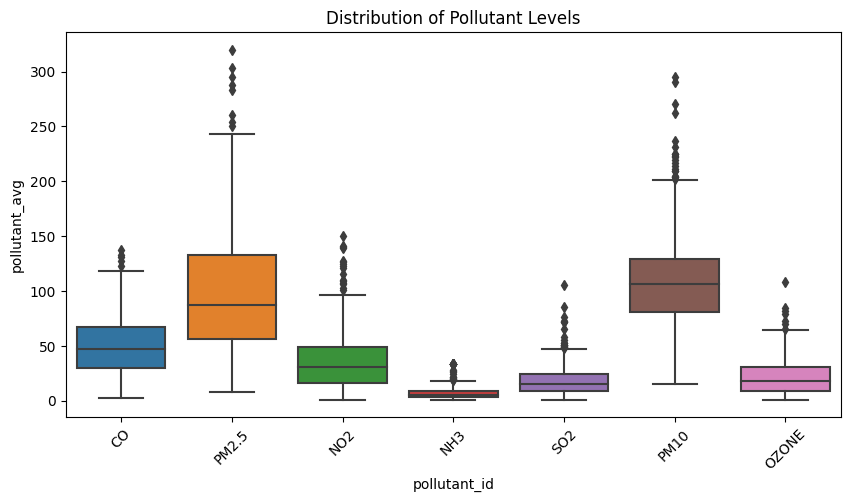

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x='pollutant_id', y='pollutant_avg', data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Pollutant Levels")
plt.show()


In [18]:
import folium
from IPython.display import display

# Create the map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)

# Add pollution data points
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['pollutant_avg'] / 10,
        popup=f"{row['city']} - {row['pollutant_id']}: {row['pollutant_avg']}",
        color="red",
        fill=True,
        fill_color="red"
    ).add_to(m)


display(m)
